## AISHWARYA PANDEY

## DATA SCIENCE AND BUSINESS ANALYTICS INTERN @ tHE SPARKS FOUNDATION

## #GRIPJUNE21 #TSF 

# Exploratory Data Analysis - Sports

## Dataset used- ‘Indian Premier League

### Objectives:
1. To find the team that won the most number of matches in a season.

2. To find the team that lost the most number of matches in a season.

3. Does winning toss increases the chances of victory.

4. To find the player with the most player of the match awards.

5. To find the city that hosted the maximum number of IPL matches.

6. To find the most winning team for each season.

7. To find the on-field umpire with the maximum number of IPL matches.

8. To find the biggest victories in IPL while defending a total and while chasing a total.

In [1]:
import pandas as pd
import numpy as np

In [2]:
url= "matches.csv"

In [3]:
df=pd.read_csv(url)

In [4]:
import warnings
warnings.filterwarnings("ignore")

In [5]:
df.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


### The dataset(matches) has 18 columns. 
#### lets explore each variable:

id: The IPL match id.
    
season: The IPL season

city: The city where the IPL match was held.

date: The date on which the match was held.

team1: One of the teams of the IPL match

team2: The other team of the IPL match

toss_winner: The team that won the toss

toss_decision: The decision taken by the team that won the toss to ‘bat’ or ‘field’

result: The result(‘normal’, ‘tie’, ‘no result’) of the match.

dl_applied: (1 or 0)indicates whether the Duckworth-Lewis rule was applied or not.

winner: The winner of the match.

win_by_runs: Provides the runs by which the team batting first won

win_by_runs: Provides the number of wickets by which the team batting second won.

player_of_match: The outstanding player of the match.

venue: The venue where the match was hosted.

umpire1: One of the two on-field umpires who officiate the match.

umpire2: One of the two on-field umpires who officiate the match.

umpire3: The off-field umpire who officiates the match

In [6]:
df.shape

(756, 18)

In [7]:
url2 = "deliveries.csv"

In [8]:
data = pd.read_csv(url2)

In [9]:
data.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [10]:
data.shape

(179078, 21)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   season           756 non-null    int64 
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

In [12]:
df.describe()

,id,season,dl_applied,win_by_runs,win_by_wickets
count,756.000000,756.000000,756.000000,756.000000,756.000000
mean,1792.178571,2013.444444,0.025132,13.283069,3.350529
std,3464.478148,3.366895,0.156630,23.471144,3.387963
min,1.000000,2008.000000,0.000000,0.000000,0.000000
25%,189.750000,2011.000000,0.000000,0.000000,0.000000
50%,378.500000,2013.000000,0.000000,0.000000,4.000000
75%,567.250000,2016.000000,0.000000,19.000000,6.000000
max,11415.000000,2019.000000,1.000000,146.000000,10.000000


## Observations:
there is a difference between mean and median(50%tile) value of above variables


also there is a difference between max and 75%tile values of above variables


It means some outliers are Present.

Observations:
The following inferences can be made from the describe() method:

The .csv file has data of IPL matches starting from the season 2008 to 2019.

The biggest margin of victory for the team batting first(win_by_runs) is 146 runs.

The biggest victory of the team batting second(win_by_wickets) is by 10 wickets.

75% of the victorious teams that bat first won by a margin of 19 runs.

75% of the victorious teams that bat second won by a margin of 6 wickets.

There were 756 IPL matches hosted from 2008 to 2019.

#### Since the 'date' is not relevant and does not provide any additional insights for our analysis, we will drop this column.
 
 #### umpire1, umpire2, and umpire3 can also be dropped for same reason.

In [13]:
df.drop(['date', 'umpire1', 'umpire2', 'umpire3'], axis=1, inplace=True)

In [14]:
df.isnull().sum()

id                 0
season             0
city               7
team1              0
team2              0
toss_winner        0
toss_decision      0
result             0
dl_applied         0
winner             4
win_by_runs        0
win_by_wickets     0
player_of_match    4
venue              0
dtype: int64

In [15]:
df=df.replace(np.nan,0)

In [16]:
data.isnull().sum()

match_id                 0
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batsman                  0
non_striker              0
bowler                   0
is_super_over            0
wide_runs                0
bye_runs                 0
legbye_runs              0
noball_runs              0
penalty_runs             0
batsman_runs             0
extra_runs               0
total_runs               0
player_dismissed    170244
dismissal_kind      170244
fielder             172630
dtype: int64

In [17]:
# there are more than 90% null values in 'player_dismissed','dismissal kind' and 'fielder' so drop these variables

In [18]:
data.drop(['player_dismissed','dismissal_kind','fielder'], axis=1, inplace=True)

In [19]:
#Check again for null values
data.isnull().sum()

match_id         0
inning           0
batting_team     0
bowling_team     0
over             0
ball             0
batsman          0
non_striker      0
bowler           0
is_super_over    0
wide_runs        0
bye_runs         0
legbye_runs      0
noball_runs      0
penalty_runs     0
batsman_runs     0
extra_runs       0
total_runs       0
dtype: int64

In [20]:
# set id as the index column
df.set_index('id', inplace=True)

In [21]:
# set match_id as the index column
data.set_index('match_id', inplace=True)

In [22]:
# merge (id,season,winner) columns in deliveries dataset which will be helpful in further analysis of data.
new_data=df[['season','winner']]

complete_data = data.merge(new_data, how='inner',left_on = data.index, right_on = df.index)

In [23]:
complete_data.head()

,key_0,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,season,winner
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,2017,Sunrisers Hyderabad
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,2017,Sunrisers Hyderabad
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,4,0,4,2017,Sunrisers Hyderabad
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,2017,Sunrisers Hyderabad
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,2,0,0,0,0,0,2,2,2017,Sunrisers Hyderabad


In [24]:
complete_data.isnull().sum()

key_0            0
inning           0
batting_team     0
bowling_team     0
over             0
ball             0
batsman          0
non_striker      0
bowler           0
is_super_over    0
wide_runs        0
bye_runs         0
legbye_runs      0
noball_runs      0
penalty_runs     0
batsman_runs     0
extra_runs       0
total_runs       0
season           0
winner           0
dtype: int64

In [25]:
#it contains no null values

# Exploratory Data Analysis

#### To check Correlation using HeatMap

<AxesSubplot:>

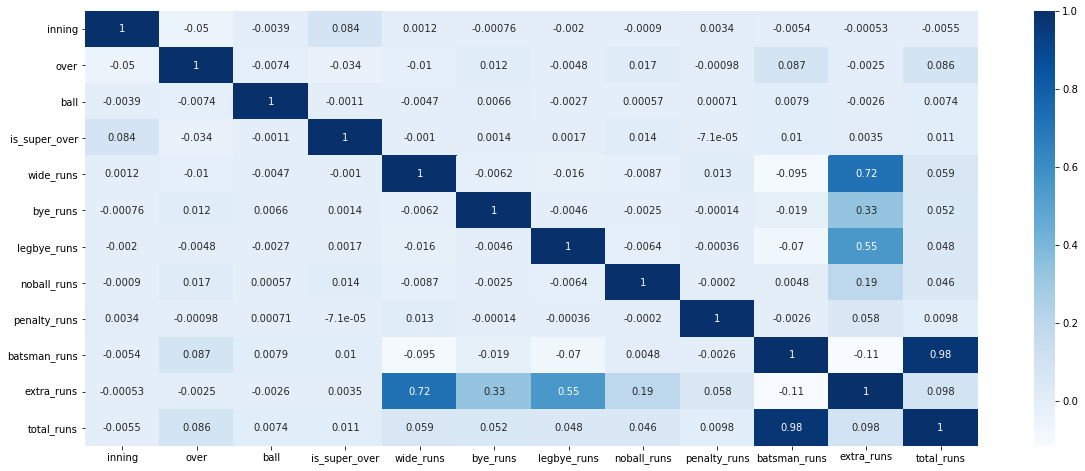

In [26]:
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(20,8))
sns.heatmap(data.corr(),cmap='Blues',annot=True)

In [27]:
# by setting annot=True you will get values by ehich variables are correlated to each other in grid-cells

In [28]:
df.head(20)

,season,city,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue
id,,,,,,,,,,,,,
1,2017,Hyderabad,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal"
2,2017,Pune,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium
3,2017,Rajkot,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium
4,2017,Indore,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium
5,2017,Bangalore,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium
6,2017,Hyderabad,Gujarat Lions,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Sunrisers Hyderabad,0,9,Rashid Khan,"Rajiv Gandhi International Stadium, Uppal"
7,2017,Mumbai,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,4,N Rana,Wankhede Stadium
8,2017,Indore,Royal Challengers Bangalore,Kings XI Punjab,Royal Challengers Bangalore,bat,normal,0,Kings XI Punjab,0,8,AR Patel,Holkar Cricket Stadium
9,2017,Pune,Delhi Daredevils,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Delhi Daredevils,97,0,SV Samson,Maharashtra Cricket Association Stadium


In [29]:
df['season'].value_counts()

2013    76
2012    74
2011    73
2010    60
2014    60
2016    60
2018    60
2019    60
2017    59
2015    59
2008    58
2009    57
Name: season, dtype: int64

## In which season highest number of matches were played?

2013    76
2012    74
2011    73
2010    60
2014    60
2016    60
2018    60
2019    60
2017    59
2015    59
2008    58
2009    57
Name: season, dtype: int64

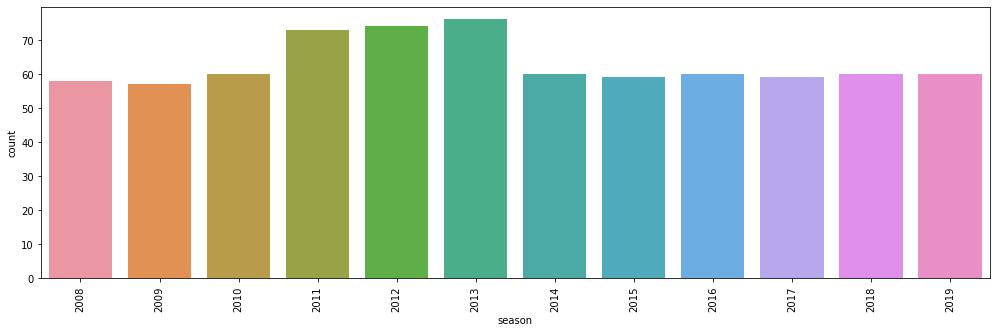

In [30]:
plt.figure(figsize=(17,5))
sns.countplot(df['season'])
plt.xticks(rotation=90)
df['season'].value_counts()

## In which City maximum matches were played?

Mumbai            101
Kolkata            77
Delhi              74
Bangalore          66
Hyderabad          64
Chennai            57
Jaipur             47
Chandigarh         46
Pune               38
Durban             15
Bengaluru          14
Visakhapatnam      13
Ahmedabad          12
Centurion          12
Rajkot             10
Mohali             10
Indore              9
Dharamsala          9
Johannesburg        8
Cape Town           7
Ranchi              7
Abu Dhabi           7
Cuttack             7
0                   7
Port Elizabeth      7
Sharjah             6
Raipur              6
Kochi               5
Kanpur              4
Nagpur              3
Kimberley           3
East London         3
Bloemfontein        2
Name: city, dtype: int64

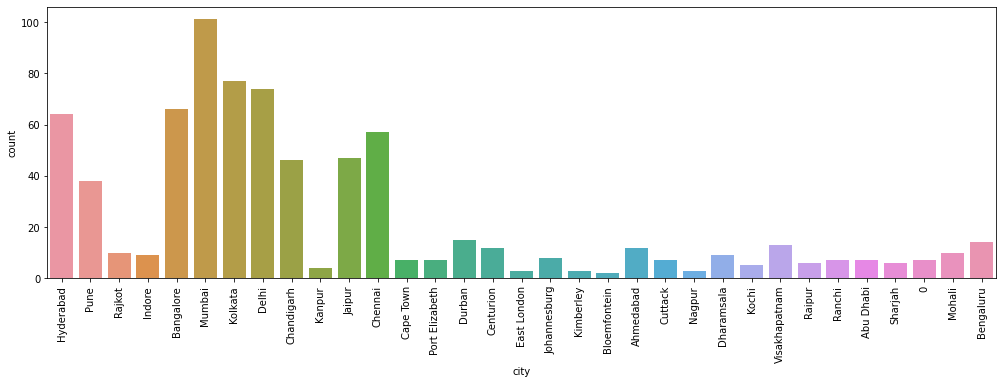

In [31]:
plt.figure(figsize=(17,5))
sns.countplot(df['city'])
plt.xticks(rotation=90)
df['city'].value_counts()

## Teams we have in IPL

Mumbai Indians                 101
Kings XI Punjab                 91
Chennai Super Kings             89
Royal Challengers Bangalore     85
Kolkata Knight Riders           83
Delhi Daredevils                72
Rajasthan Royals                67
Sunrisers Hyderabad             63
Deccan Chargers                 43
Pune Warriors                   20
Gujarat Lions                   14
Rising Pune Supergiant           8
Kochi Tuskers Kerala             7
Rising Pune Supergiants          7
Delhi Capitals                   6
Name: team1, dtype: int64

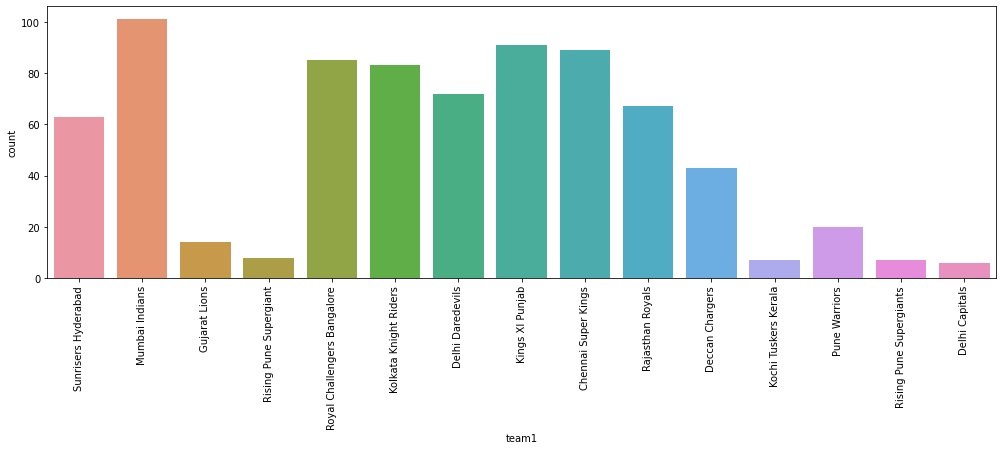

In [32]:
plt.figure(figsize=(17,5))
sns.countplot(df['team1'])
plt.xticks(rotation=90)
df['team1'].value_counts()

### Result: Mumbai India has won max of toss that is why they mostly played as Team1

Royal Challengers Bangalore    95
Kolkata Knight Riders          95
Delhi Daredevils               89
Mumbai Indians                 86
Kings XI Punjab                85
Rajasthan Royals               80
Chennai Super Kings            75
Sunrisers Hyderabad            45
Deccan Chargers                32
Pune Warriors                  26
Gujarat Lions                  16
Delhi Capitals                 10
Rising Pune Supergiant          8
Kochi Tuskers Kerala            7
Rising Pune Supergiants         7
Name: team2, dtype: int64

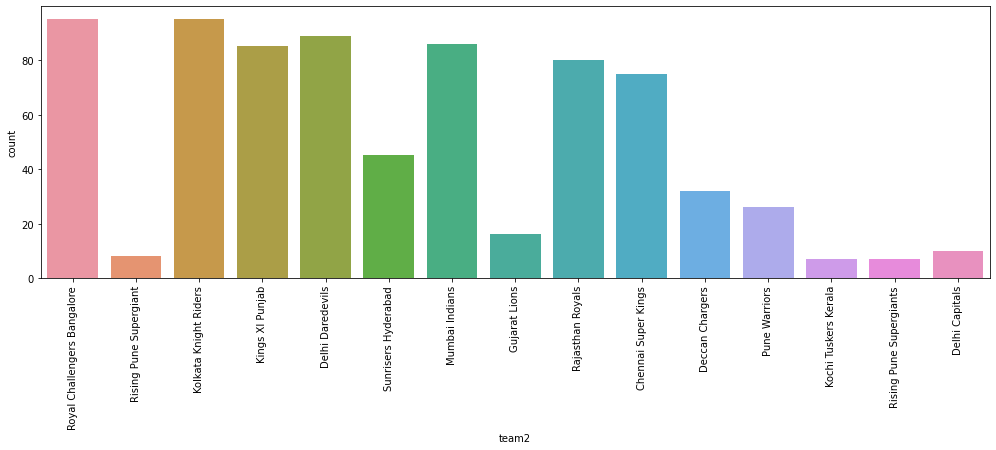

In [33]:
plt.figure(figsize=(17,5))
sns.countplot(df['team2'])
plt.xticks(rotation=90)
df['team2'].value_counts()

## Which team has won Maximum of Toss?

Mumbai Indians                 98
Kolkata Knight Riders          92
Chennai Super Kings            89
Royal Challengers Bangalore    81
Kings XI Punjab                81
Delhi Daredevils               80
Rajasthan Royals               80
Sunrisers Hyderabad            46
Deccan Chargers                43
Pune Warriors                  20
Gujarat Lions                  15
Delhi Capitals                 10
Kochi Tuskers Kerala            8
Rising Pune Supergiants         7
Rising Pune Supergiant          6
Name: toss_winner, dtype: int64

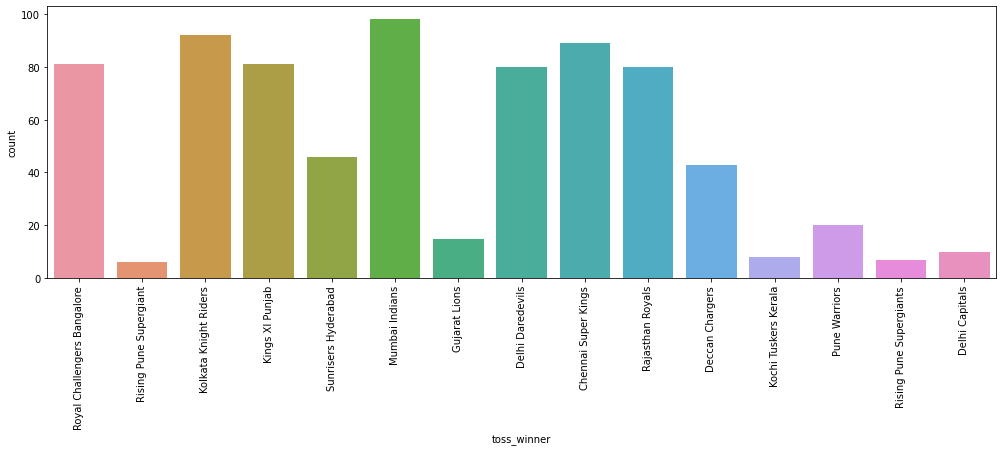

In [34]:
plt.figure(figsize=(17,5))
sns.countplot(df['toss_winner'])
plt.xticks(rotation=90)
df['toss_winner'].value_counts()

field    463
bat      293
Name: toss_decision, dtype: int64

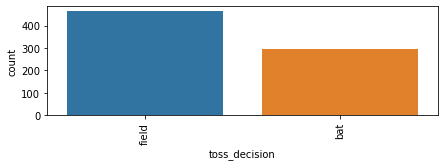

In [35]:
plt.figure(figsize=(7,2))
sns.countplot(df['toss_decision'])
plt.xticks(rotation=90)
df['toss_decision'].value_counts()

### Result: Team mostly select Feilding than Batting.

## What is the Result of the match?

normal       743
tie            9
no result      4
Name: result, dtype: int64

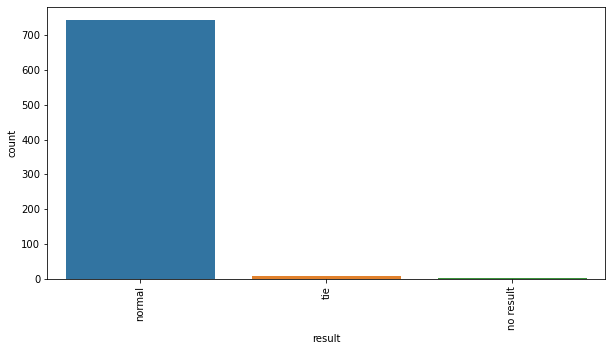

In [36]:
plt.figure(figsize=(10,5))
sns.countplot(df['result'])
plt.xticks(rotation=90)
df['result'].value_counts()

## How Many times Duckworth Lewis method was applied?

0    737
1     19
Name: dl_applied, dtype: int64

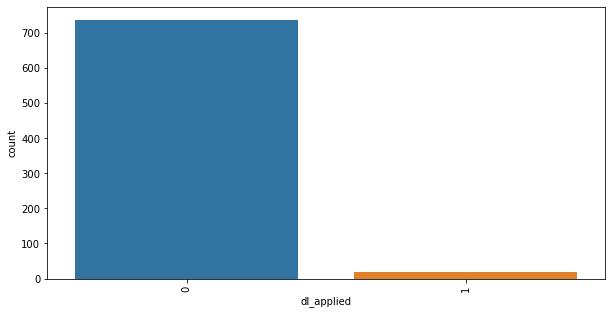

In [37]:
plt.figure(figsize=(10,5))
sns.countplot(df['dl_applied'])
plt.xticks(rotation=90)
df['dl_applied'].value_counts()

### Result: 19 times between 2008 to 2019

## Which team has mostly won the match?

Mumbai Indians                 109
Chennai Super Kings            100
Kolkata Knight Riders           92
Royal Challengers Bangalore     84
Kings XI Punjab                 82
Rajasthan Royals                75
Delhi Daredevils                67
Sunrisers Hyderabad             58
Deccan Chargers                 29
Gujarat Lions                   13
Pune Warriors                   12
Rising Pune Supergiant          10
Delhi Capitals                  10
Kochi Tuskers Kerala             6
Rising Pune Supergiants          5
0                                4
Name: winner, dtype: int64

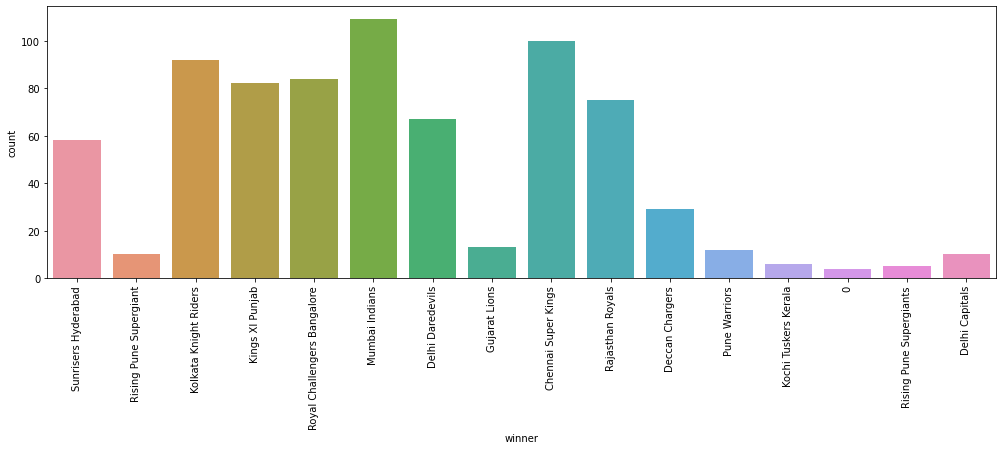

In [38]:
plt.figure(figsize=(17,5))
sns.countplot(df['winner'])
plt.xticks(rotation=90)
df['winner'].value_counts()

## By how many Runs they have mostly won?

0      419
14      13
4       11
10      11
1       10
      ... 
76       1
111      1
74       1
42       1
118      1
Name: win_by_runs, Length: 89, dtype: int64

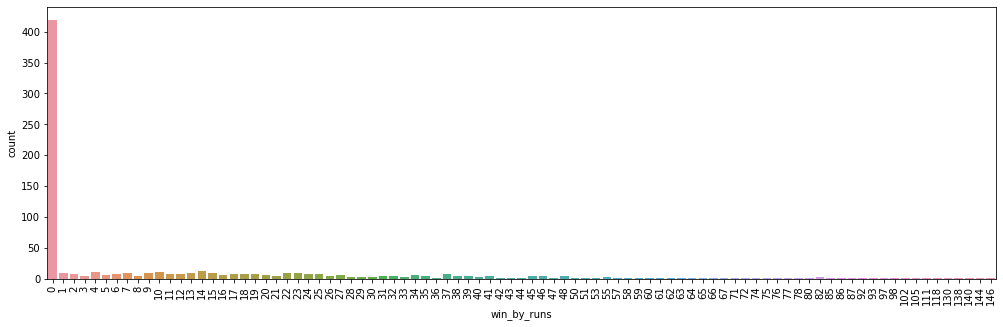

In [39]:
plt.figure(figsize=(17,5))
sns.countplot(df['win_by_runs'])
plt.xticks(rotation=90)
df['win_by_runs'].value_counts()

## Won By Wickets

0     350
6      85
7      80
5      71
8      54
4      41
9      37
3      18
10     11
2       6
1       3
Name: win_by_wickets, dtype: int64

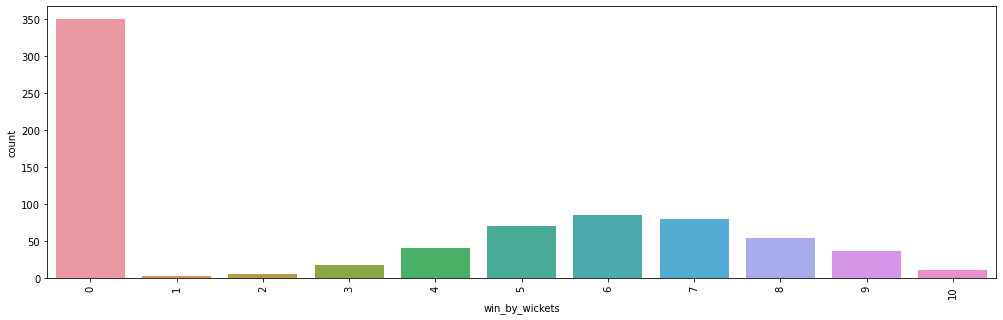

In [40]:
plt.figure(figsize=(17,5))
sns.countplot(df['win_by_wickets'])
plt.xticks(rotation=90)
df['win_by_wickets'].value_counts()

### REsult:  Team has mostly won by 6 wickets

CH Gayle          21
AB de Villiers    20
RG Sharma         17
MS Dhoni          17
DA Warner         17
                  ..
PD Collingwood     1
NV Ojha            1
AC Voges           1
J Theron           1
S Hetmyer          1
Name: player_of_match, Length: 227, dtype: int64

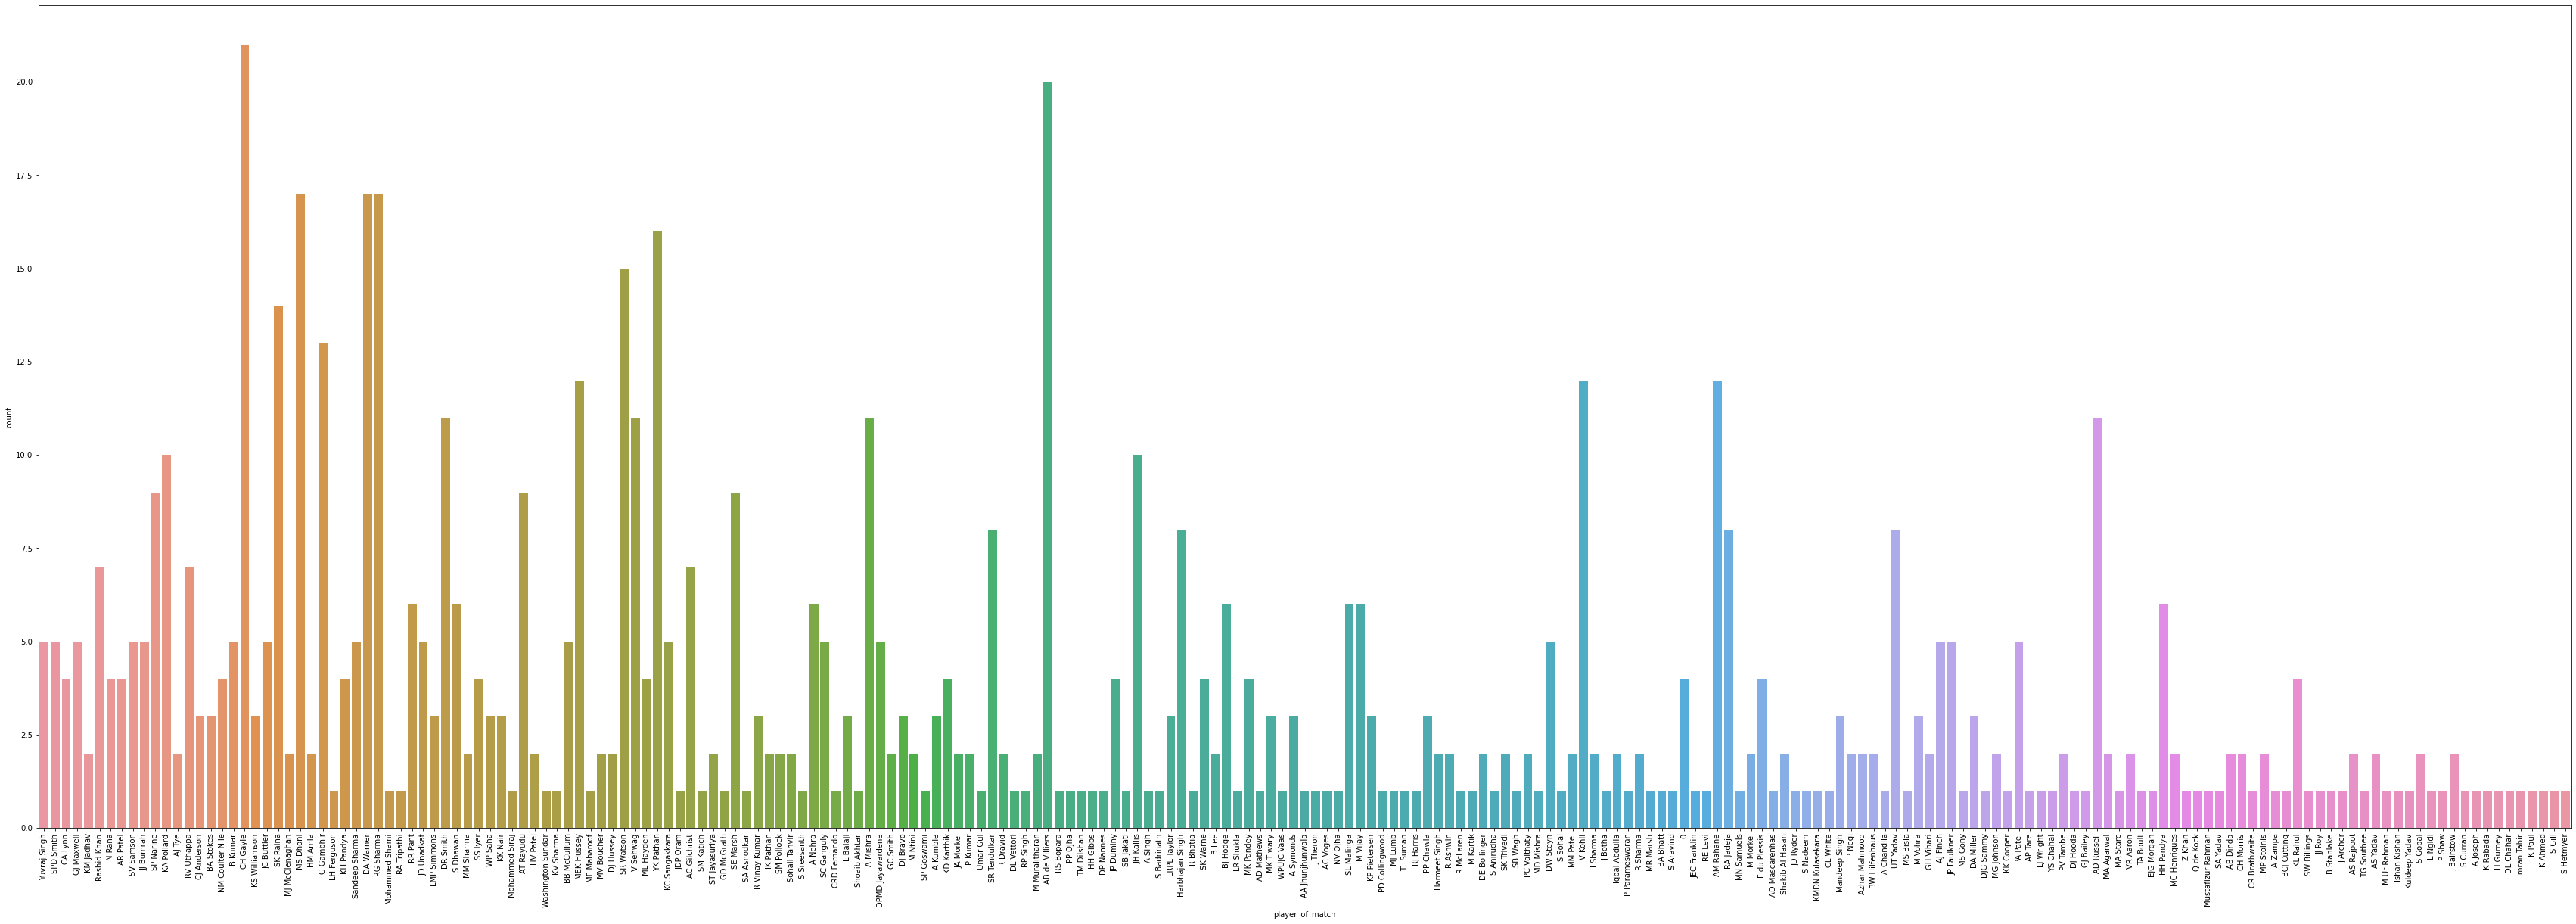

In [41]:
plt.figure(figsize=(60,20))
sns.countplot(df['player_of_match'])
plt.xticks(rotation=90)
df['player_of_match'].value_counts()

## Match Mostly played in which Stadium? 

Eden Gardens                                            77
M Chinnaswamy Stadium                                   73
Wankhede Stadium                                        73
Feroz Shah Kotla                                        67
Rajiv Gandhi International Stadium, Uppal               56
MA Chidambaram Stadium, Chepauk                         49
Sawai Mansingh Stadium                                  47
Punjab Cricket Association Stadium, Mohali              35
Maharashtra Cricket Association Stadium                 21
Subrata Roy Sahara Stadium                              17
Dr DY Patil Sports Academy                              17
Kingsmead                                               15
Punjab Cricket Association IS Bindra Stadium, Mohali    14
SuperSport Park                                         12
Sardar Patel Stadium, Motera                            12
Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium     11
Brabourne Stadium                                       

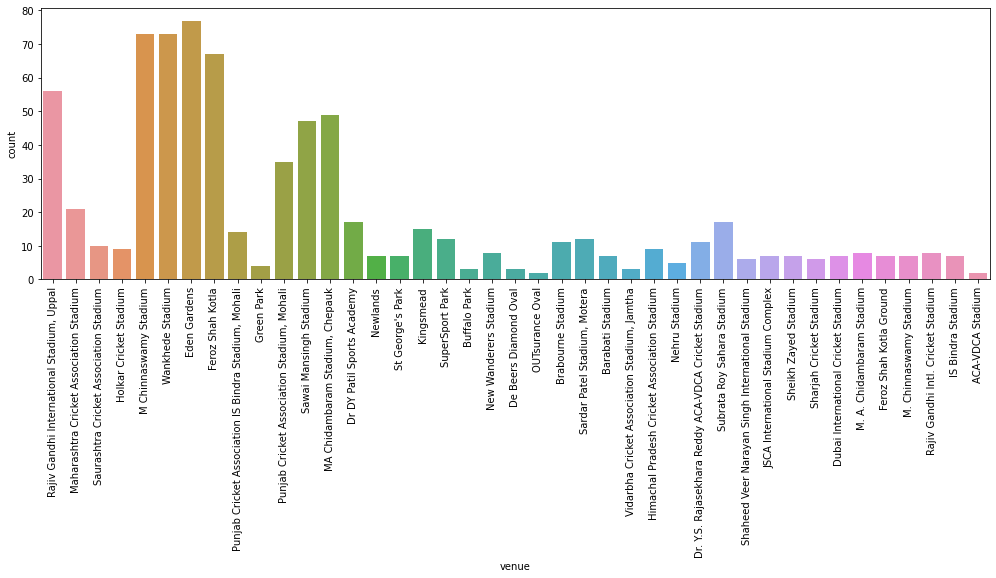

In [42]:
plt.figure(figsize=(17,5))
sns.countplot(df['venue'])
plt.xticks(rotation=90)
df['venue'].value_counts()

## Winner of each Season:

In [43]:
season_winner = df.drop_duplicates(subset=['season'], keep='last')[['season', 'winner']]
season_winner.sort_values(by="season").reset_index(drop=True)

,season,winner
0,2008,Rajasthan Royals
1,2009,Deccan Chargers
2,2010,Chennai Super Kings
3,2011,Chennai Super Kings
4,2012,Kolkata Knight Riders
5,2013,Mumbai Indians
6,2014,Kolkata Knight Riders
7,2015,Mumbai Indians
8,2016,Sunrisers Hyderabad
9,2017,Mumbai Indians


## Which team has played maximum Matches?

In [44]:
max_matches = pd.DataFrame(
{'Total Matches Played': df["team1"].value_counts() + df["team2"].value_counts(),
 'Total Matches Won': df["winner"].value_counts(), 
 'Total Matches Lost': ((df['team1'].value_counts() + df['team2'].value_counts())-df["winner"].value_counts())
})
max_matches.sort_values(by="Total Matches Played", ascending=False)

,Total Matches Played,Total Matches Won,Total Matches Lost
Mumbai Indians,187.0,109,78.0
Royal Challengers Bangalore,180.0,84,96.0
Kolkata Knight Riders,178.0,92,86.0
Kings XI Punjab,176.0,82,94.0
Chennai Super Kings,164.0,100,64.0
Delhi Daredevils,161.0,67,94.0
Rajasthan Royals,147.0,75,72.0
Sunrisers Hyderabad,108.0,58,50.0
Deccan Chargers,75.0,29,46.0
Pune Warriors,46.0,12,34.0


## Relation between toss and match winners?

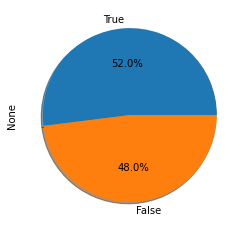

In [45]:
df_toss = df['toss_winner'] == df["winner"]
ax = df_toss.value_counts().plot(kind="pie", autopct='%1.1f%%', shadow=True)

#### Result:This piechart shows that winning toss actually helped to win the match as well by 51.3%

# Working on Deliveries Dataset.

1    92742
2    86240
3       50
4       38
5        8
Name: inning, dtype: int64

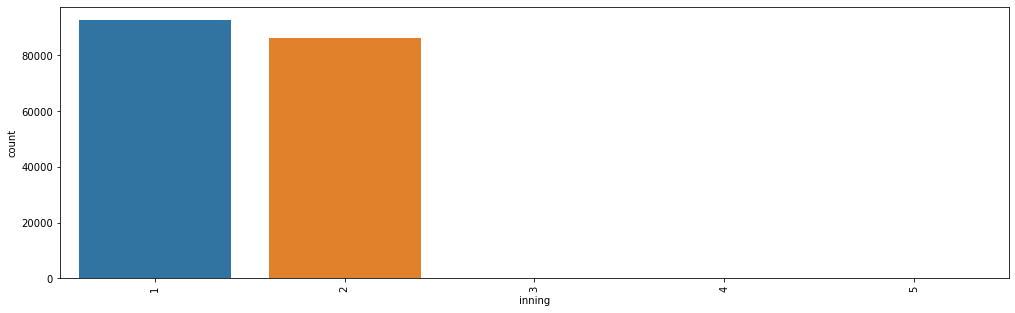

In [46]:
plt.figure(figsize=(17,5))
sns.countplot(data['inning'])
plt.xticks(rotation=90)
data['inning'].value_counts()

## Which Team has done Maximum Batting?

Mumbai Indians                 22619
Kings XI Punjab                20931
Royal Challengers Bangalore    20908
Kolkata Knight Riders          20858
Chennai Super Kings            19762
Delhi Daredevils               18786
Rajasthan Royals               17292
Sunrisers Hyderabad            12908
Deccan Chargers                 9034
Pune Warriors                   5443
Gujarat Lions                   3566
Delhi Capitals                  1909
Rising Pune Supergiant          1900
Kochi Tuskers Kerala            1582
Rising Pune Supergiants         1580
Name: batting_team, dtype: int64

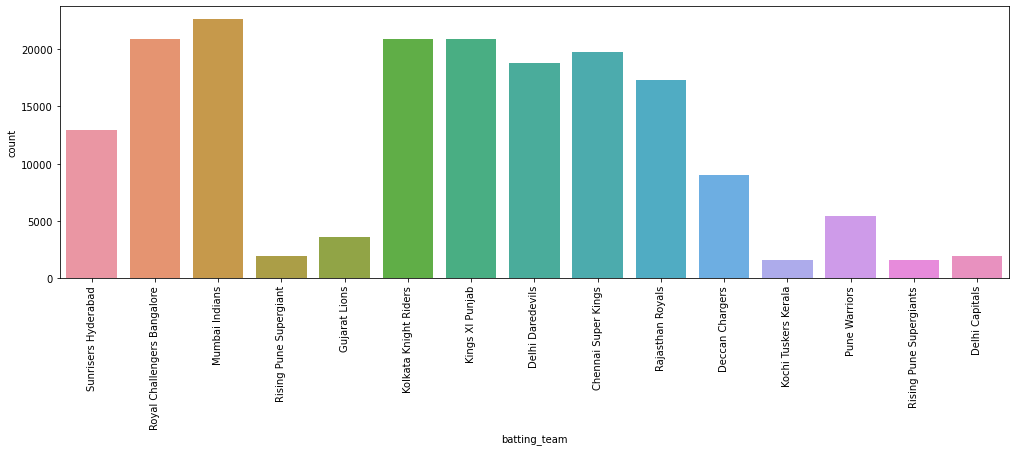

In [47]:
plt.figure(figsize=(17,5))
sns.countplot(data['batting_team'])
plt.xticks(rotation=90)
data['batting_team'].value_counts()

## Which Team has done Maximum Bowling?

Mumbai Indians                 22517
Royal Challengers Bangalore    21236
Kolkata Knight Riders          20940
Kings XI Punjab                20782
Chennai Super Kings            19556
Delhi Daredevils               18725
Rajasthan Royals               17382
Sunrisers Hyderabad            12779
Deccan Chargers                 9039
Pune Warriors                   5457
Gujarat Lions                   3545
Delhi Capitals                  1963
Rising Pune Supergiant          1928
Rising Pune Supergiants         1615
Kochi Tuskers Kerala            1614
Name: bowling_team, dtype: int64

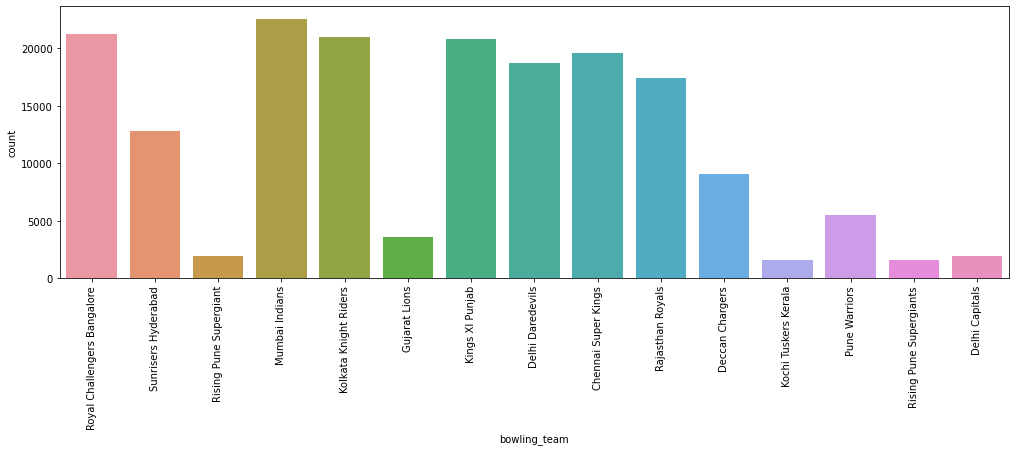

In [48]:
plt.figure(figsize=(17,5))
sns.countplot(data['bowling_team'])
plt.xticks(rotation=90)
data['bowling_team'].value_counts()

# Over-Over Number

1     9603
2     9498
3     9415
4     9379
5     9345
6     9326
7     9283
8     9253
9     9231
10    9184
11    9120
12    9090
13    9073
14    8978
15    8900
16    8761
17    8648
18    8387
19    7866
20    6738
Name: over, dtype: int64

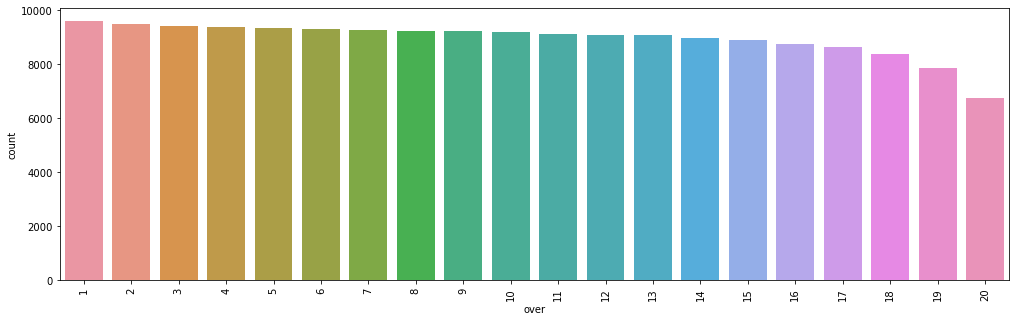

In [49]:
plt.figure(figsize=(17,5))
sns.countplot(data['over'])
plt.xticks(rotation=90)
data['over'].value_counts()

# ball- Ball Number in the over

1    29047
2    28963
3    28878
4    28812
5    28720
6    28628
7     5113
8      795
9      122
Name: ball, dtype: int64

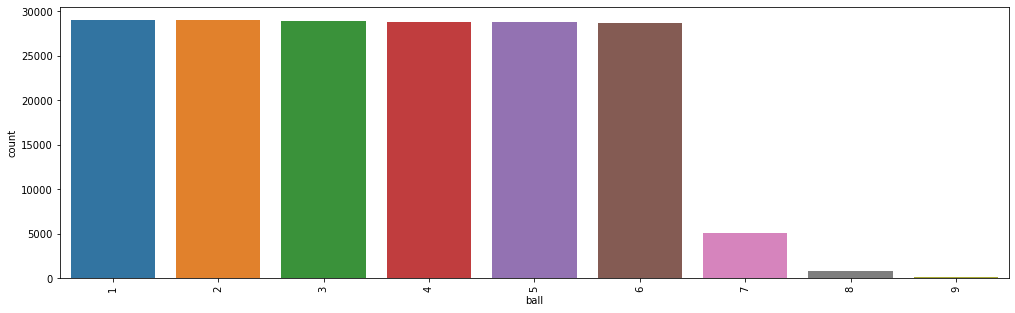

In [50]:
plt.figure(figsize=(17,5))
sns.countplot(data['ball'])
plt.xticks(rotation=90)
data['ball'].value_counts()

# batsman- Name of the batsman at crease

In [51]:
data['batsman'].value_counts()

V Kohli          4211
SK Raina         4044
RG Sharma        3816
S Dhawan         3776
G Gambhir        3524
                 ... 
K Ahmed             1
U Kaul              1
DP Vijaykumar       1
P Raj               1
LH Ferguson         1
Name: batsman, Length: 516, dtype: int64

# name of Batsman at non striker end

In [52]:
data['non_striker'].value_counts()

SK Raina            4173
S Dhawan            4090
V Kohli             4071
RG Sharma           3858
G Gambhir           3740
                    ... 
VRV Singh              2
S Randiv               1
BW Hilfenhaus          1
TP Sudhindra           1
PM Sarvesh Kumar       1
Name: non_striker, Length: 511, dtype: int64

# bowler- Bowler who bowled the over

In [53]:
data['bowler'].value_counts()

Harbhajan Singh     3451
A Mishra            3172
PP Chawla           3157
R Ashwin            3016
SL Malinga          2974
                    ... 
Y Gnaneswara Rao       6
P Prasanth             6
SPD Smith              2
SN Khan                2
AC Gilchrist           1
Name: bowler, Length: 405, dtype: int64

# Players with most 4s:

<AxesSubplot:title={'center':'Top Players with most 4s'}, xlabel='batsman'>

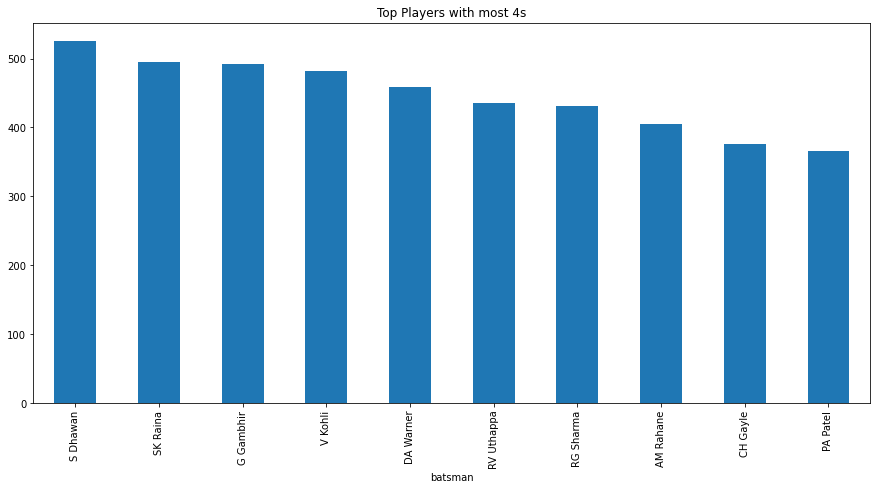

In [54]:
data[data["batsman_runs"] == 4].groupby("batsman")["batsman_runs"].count().sort_values(ascending = False).head(10).plot(kind='bar', title="Top Players with most 4s", figsize=(15,7))

# Players with most 6s:

<AxesSubplot:title={'center':'Top Players with most 6s'}, xlabel='batsman'>

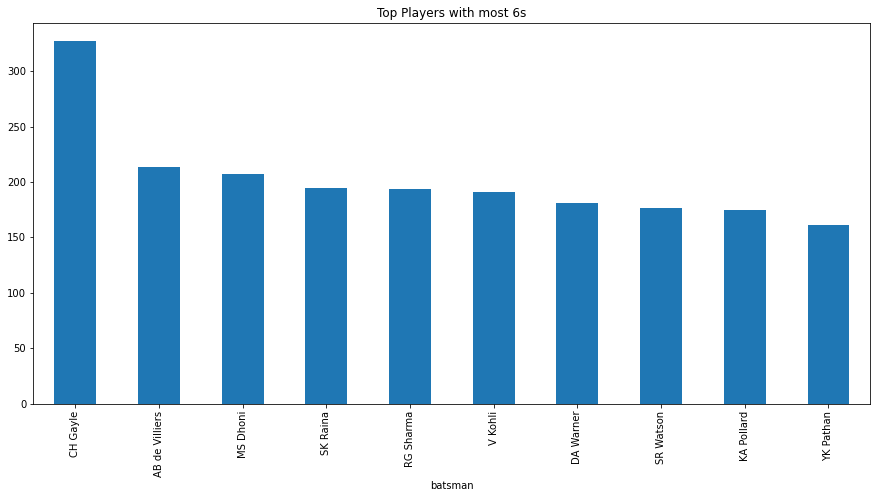

In [55]:
data[data["batsman_runs"] == 6].groupby("batsman")["batsman_runs"].count().sort_values(ascending = False).head(10).plot(kind='bar', title="Top Players with most 6s", figsize=(15,7))

# Batsman with top bat runner  score:

In [56]:
top_batsman=data.groupby('batsman')['batsman_runs'].agg(['sum']).reset_index().sort_values('sum',ascending=False).reset_index(drop=True)
top_batsman=top_batsman.rename(columns={'sum':'batsman_runs'})
top_batsman.iloc[:10,:]

,batsman,batsman_runs
0,V Kohli,5434
1,SK Raina,5415
2,RG Sharma,4914
3,DA Warner,4741
4,S Dhawan,4632
5,CH Gayle,4560
6,MS Dhoni,4477
7,RV Uthappa,4446
8,AB de Villiers,4428
9,G Gambhir,4223


# Penalty Runs:

0    179076
5         2
Name: penalty_runs, dtype: int64

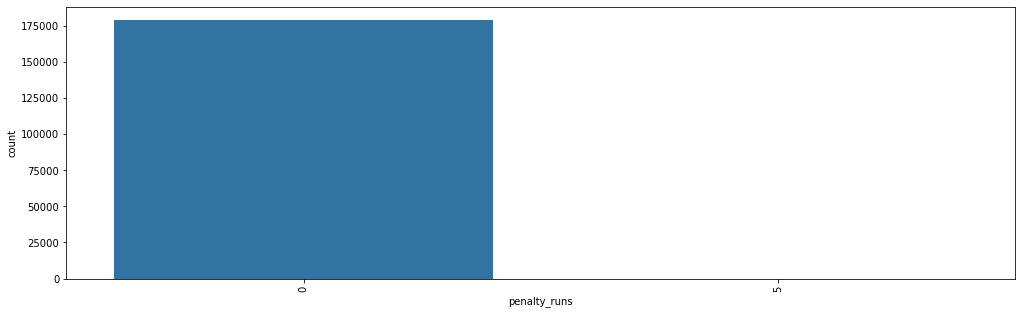

In [57]:
plt.figure(figsize=(17,5))
sns.countplot(data['penalty_runs'])
plt.xticks(rotation=90)
data['penalty_runs'].value_counts()

# Total_Runs: Total_Extra+Runs by batsman

1     73059
0     63002
4     20599
2     13125
6      8148
3       688
5       339
8        64
7        38
10       16
Name: total_runs, dtype: int64

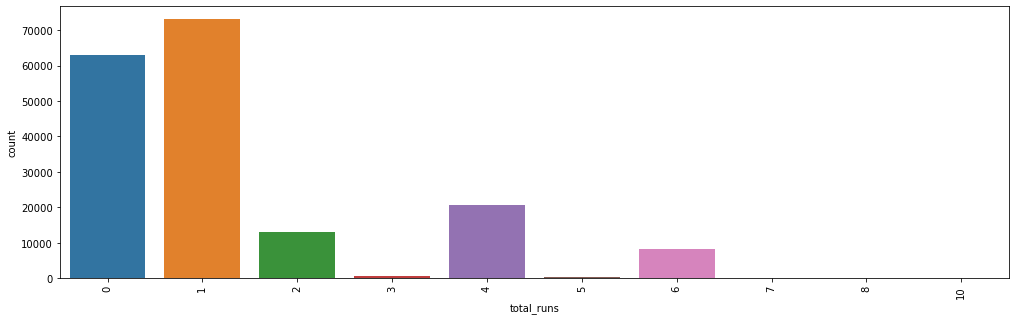

In [58]:
plt.figure(figsize=(17,5))
sns.countplot(data['total_runs'])
plt.xticks(rotation=90)
data['total_runs'].value_counts()

# Conclusions:
    

1.We have got the dataset with data for 11 IPL seasons from 2008 to 2018

2.Total matches played in these seasons is 696

3.Most number of matches which is 76 were played in season 2013

4.Most number of matches which is 73, were played in M Chinnaswamy Stadium

5.Mumbai Indians played most matches which is 171 followed by RCB 166

6.Mumbai Indians won most matches 98 followed by CSK 90

7.Mumbai Indians and CSK have won 3 seasons each

  -Mumbai Indians in 2013, 2015 and 2017

  -CSK in 2010, 2011 and 2018

8.Winning a team has actually helped the team to win the match as well by 51.3%

9.Mumbai Indians won only 55.56% of the matches in which they won the toss

10.Feroz Shah Kotla stadium is the best stadium for winning by runs

11.Mumbai Indians won most matches in season 2013

12.CH Gayle has got most man of the match award i.e. 20 times

13.G Gambhir has scored most 4s in IPL history

14.CH Gayle has scored most 6s in IPL history